# Introduction
Fill sth here whenever you are inspired.

In [3]:
%load_ext autoreload
%autoreload 2

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.metrics import mean_squared_error

# Example: Polynomial Curve Fitting
Assume that we have two real valued quantities $x, t \in \mathbb{R}$ that are related via some "map" that we are interested in "learning". We will generate artificial data for this example so that we already know the function that relates $t$ and $x$, for example: t = $\sin(2 \pi x)$ plus some random noise drawn from a normal distribution. In this case the variables $x,t \in [0,1]$.

Suppose that we are given $N$ samples (observations) of this relation between $x$ and $t$. This is, we are given a vector $\mathbf{X} = (x_1, x_2, \dots, x_N)^T$ together with $N$ observations of the target variable $\mathbf{t} = (t_1, t_2, \dots, t_N)^T$.

In [1]:
def f(x):
    '''
    '''
    return np.sin(2*np.pi**x)

In [40]:
x = np.arange(0,1,0.05)
rand_noise = np.random.normal(0, 0.2, size = 20)
f = np.sin(2* np.pi *x)
t = f + rand_noise

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


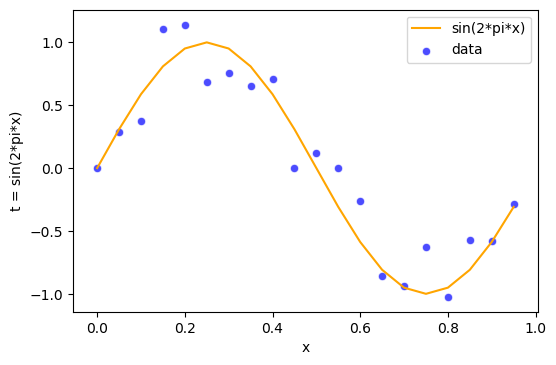

In [197]:
fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(x,t, ax = ax, color = 'blue', label = 'data', alpha = 0.7)
sns.lineplot(x, f, color = 'orange', label = 'sin(2*pi*x)')
ax.set_xlabel('x')
ax.set_ylabel('t = sin(2*pi*x)')
fig.show()

Our goal is to use the observation data (training dataset) to make predictions about the target variable $t$. Such that we can return the value $\hat{t}$ for any observation new $\hat{x}$, new in the sense that it has not been seen by our "prediction method" whatever it is.

Our first approach will be a simple ploynomial fit. This means that we are going to fit data using a polynomial function of the form:
$$y(x, \vec{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_M x^M = \sum_{j=0}^{M}w_j x^j,$$

where $M$ is the order of the polynomial. Notice that this function is non-linear on the variable $x$ but is linear in the parameters $w$. Functions of this kind, that depend linearly on the unkwnon parameters are called **linear models**.

How to determine the values of these coefficients? Well, the answer to this question is the at the core of what we know as **Machine Learning**. The values of the coefficients $\vec{w}$ are going to be estimated by fitting the polynomial to the observations (training data), such that an **error function** is minimized. This error function should measure the misfit between the output of the function $y(x, \vec{w})$ and the actual observation (training data). One simple choice of such error function is given by the sum of the squares of the errors between predictions and observations, namely:
$$E(\vec{w}) = \dfrac{1}{2}\sum_{n=1}^{N}\left(y(x_n, \vec{w})- t_n\right)^2.$$

Note that $E(\vec{w}) = 0$ when $y(x_n, \vec{w}) = t_n$ for all $n$, this is, the error is null when the predictions coincide with the observations.

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


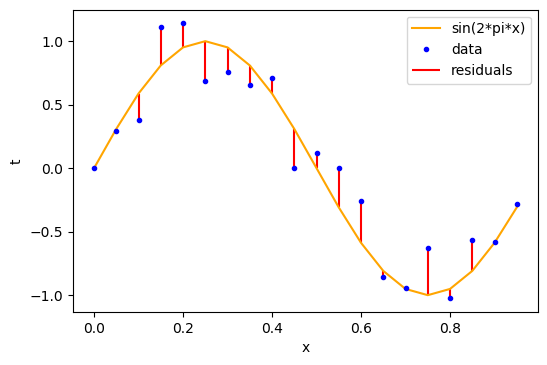

In [55]:
fig, ax = plt.subplots( dpi = 100)
ax.plot(x, f, '-', color = 'orange', label = 'sin(2*pi*x)')
ax.plot(x, t, '.', color = 'blue', label = 'data')
ax.vlines(x, f, t, 'red', label = 'residuals')
ax.legend(loc = 'best')
ax.set_xlabel('x')
ax.set_ylabel('t')
fig.show()

We wont dwelve into working the details of *least squares* approximation. The exact solution is, in general, known and there are at least two ways of obtaining it. One that uses the resources of calculus and the other that exploits geometrical observations about the problem to find the solution. We will see this in detail in the third notebook (probably).

Instead at this point we want to give a general overview of the central problem in *machine learning*, that of fitting a function to data in order to generalize the behavior, we will be more precise about this. To this intent, we will simply use the available resources to show how this works: [np.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

We will fit polynomials with degrees $1, 3, 9$ and $25$ to the artificial data we created using a sine function and some random noise. To gain intuition about what is known as *bias variance tradeoff* we will use the polynomial fit on test data that was **not necessarily** used to *tune* the parameters by solving the least square approximation.

In [146]:
def generate_dataset(size = 20, random_seed = 42):
    '''
    
    '''
    random.seed(random_seed)
    x = np.arange(0,1,1/size)
    rand_noise = np.random.normal(0, 0.2, size = size)
    y_true = np.sin(2* np.pi *x)
    y = y_true + rand_noise
    
    return x, y, y_true

In [187]:
X_train, y_train, y_train_true = generate_dataset()
X_test, y_test, y_test_true = generate_dataset(size = 100, random_seed = 666)


In [267]:
%%time
M = [1, 3, 9, 15] 
predictions = {str(m): [] for m in M}
models = {str(m): None for m in M}
for m in M:
    polynomial = np.poly1d(np.polyfit(X_train, y_train, deg = m))
    models[str(m)] = polynomial
    predictions[str(m)] = polynomial(X_test)

CPU times: user 977 µs, sys: 1.03 ms, total: 2 ms
Wall time: 4.59 ms


In [276]:
def plot_polynomial_fit(x, y, data, true_curve, data_label = 'data', pred_label = 'predictions', ax = None):
    '''
    
    '''
    if ax == None:
        fig, ax = plt.subplots(dpi = 120)
    ax.plot(x, y, '--', label = pred_label, color = 'green')
    ax.plot(x, true_curve, '-', color = 'orange', label = 'sin(2*pi*x)')
    ax.plot(x, data, '.', color = 'blue', label = data_label, alpha = 0.6)
    ax.legend( fontsize = 7)
    return ax

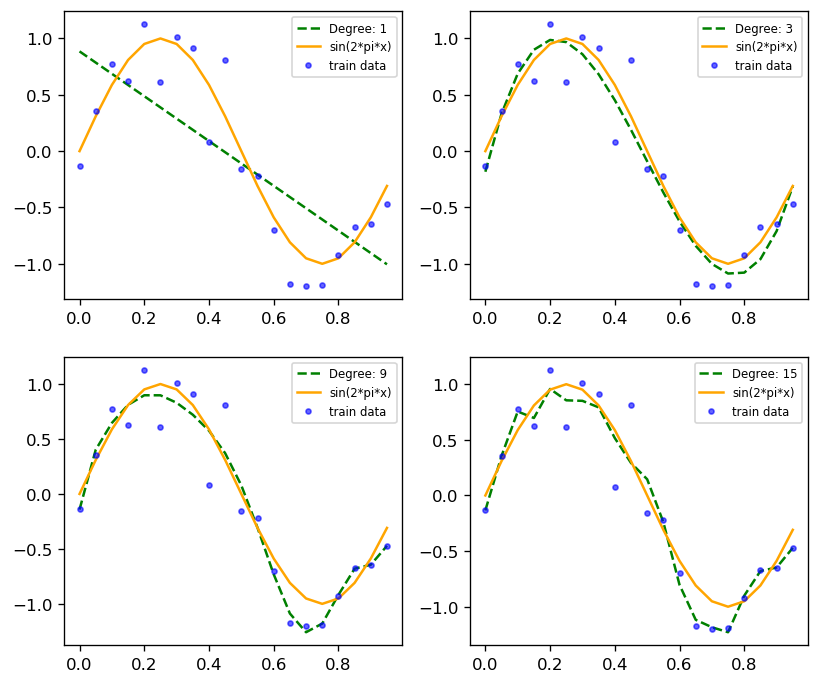

In [277]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_train, models[str(M[0])](X_train), 
                    y_train, y_train_true, 
                    data_label = 'train data',
                    pred_label = f'Degree: {M[0]}',
                    ax = ax[0,0])
plot_polynomial_fit(X_train, models[str(M[1])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[1]}',
                    data_label = 'train data',
                    ax = ax[0,1])
plot_polynomial_fit(X_train, models[str(M[2])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[2]}',
                    data_label = 'train data',
                    ax = ax[1,0])
plot_polynomial_fit(X_train, models[str(M[3])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[3]}', 
                    data_label = 'train data',
                    ax = ax[1,1])


/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


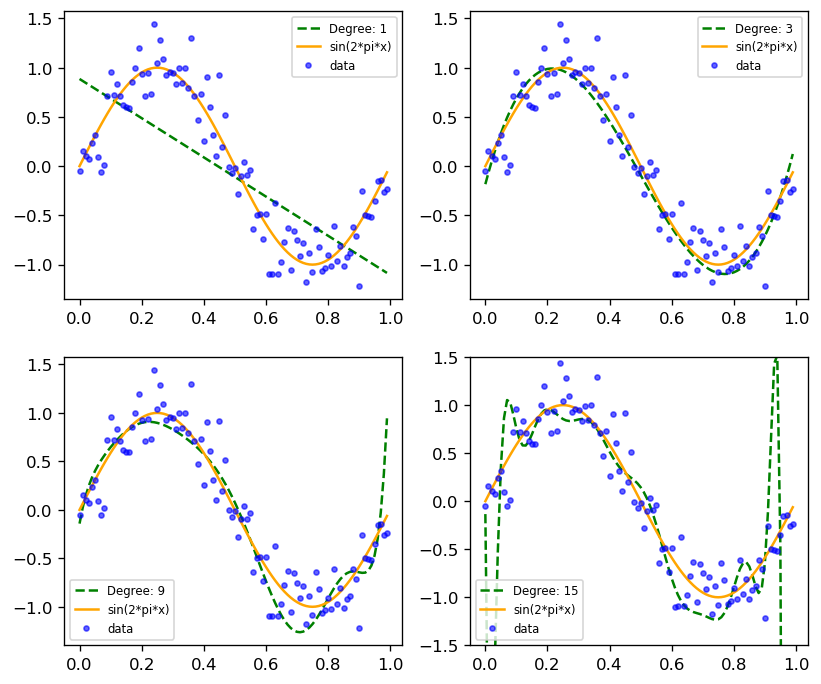

In [281]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_test, predictions[str(M[0])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[0]}', ax = ax[0,0])
plot_polynomial_fit(X_test, predictions[str(M[1])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[1]}', ax = ax[0,1])
plot_polynomial_fit(X_test, predictions[str(M[2])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[2]}', ax = ax[1,0])
plot_polynomial_fit(X_test, predictions[str(M[3])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[3]}', ax = ax[1,1])
ax[1,1].set_ylim(-1.5,1.5)
fig.show()

At this point it should have naturally arised the question of which of the models we are going to choose as our final estimative of the relation between the observations $(x, y)$ and the ground truth values $(x, \sin(2 \pi x))$. 

The above figures show that the polynomial fit with degree $=1$ is not a good estimative of the relation between the variables since it predicts a straight line that is no close to the real values of the sinusoidal curve. On the other hand we see that the higher degree polynomial fits tend to **overfit**, this is, they tend to aqcuire a very complex behavior in order to be as near as possible to the training target values `y_train`, this can be seen in the case of the degree 15 polynomial fit in the bottom right. In this case, it appears that the polynomial model with degree $3$ is the best estimative of the sinusoidal function, and we were able to see this because we knew the ground truth values of the function beforehand. Of course this is not the case in real life.

This fact is easier to see when we look at the actual prediction errors for each of the polynomial models. There are several measures of misfit (prediction error), we will exhibit what is known as **Root Mean Squared** or RMS error, for an $N$-sized observation sample where $y$ is the ground-truth value and $\hat{y}$ is the predicted value:
$$\text{RMS} =\sqrt{ \dfrac{\sum_{i = 1}^N(\hat{y}_i - y_i)^2}{N}}$$

We will just retrain polynomial models trying even more values for the degree of the polynomial, to have better view of how the train and test errors vary with the complexity of the models.

In [282]:
%%time
M = np.arange(1, 15)
predictions = {str(m): [] for m in M}
models = {str(m): None for m in M}
for m in M:
    polynomial = np.poly1d(np.polyfit(X_train, y_train, deg = m))
    models[str(m)] = polynomial
    predictions[str(m)] = polynomial(X_test)

CPU times: user 2.43 ms, sys: 207 µs, total: 2.63 ms
Wall time: 2.46 ms


In [283]:
def rmse_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [284]:
train_error = {str(m): None for m in M}
test_error = {str(m): None for m in M}

for m in M:
    train_error[str(m)] = rmse_error(y_train, models[str(m)](X_train))
    test_error[str(m)] = rmse_error(y_test, models[str(m)](X_test))

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


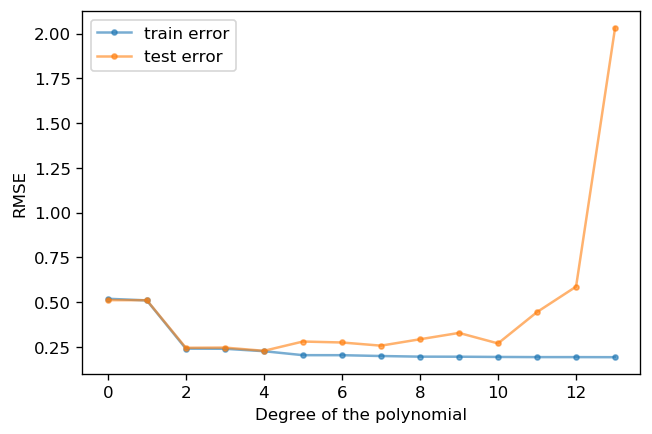

In [285]:
fig, ax = plt.subplots(dpi = 120)
ax.plot(list(train_error.values()), '.-', label = 'train error', alpha = 0.6)
ax.plot(list(test_error.values()), '.-', label = 'test error', alpha = 0.6)
ax.legend()
ax.set_xlabel('Degree of the polynomial')
ax.set_ylabel('RMSE')
fig.show()

The above figure shows that the test error tends to get bigger and off the train error as the complexity of the models increases. Notice how the train error decreases as the test error goes off, this is a clear signature of **overfitting**. One technique that is often used to avoid overfitting is known as **regularization**. The main idea of regularization is to add a penalty term to the loss function that in the case of polynomial curve fitting discourages the coefficients to take large values. The simplest regularization term consists on adding the sum of squares of all coefficients:
$$\tilde{E}(\vec{w}) = \dfrac{1}{2}\sum_{n=1}^{N}\left(y(x_n, \vec{w})- t_n\right)^2 + \dfrac{\lambda}{2} \Vert \vec{w}\Vert ^2,$$
where $\Vert \vec{w}\Vert = \mathbf{w}^T \mathbf{w} = w_0^2 + w_1^2 + \dots + w_M^2$, and the coefficient $\lambda$ controls the importance of the regularization term with respect to the main loss error. The inclusion of this regularization term is often known as **Ridge regression** or **Tikhonov regularization**. 

In the following cells we implement a Ridge polynomial regression with the aid of sklearn methods, in particular we will use the `PolynomialFeatures` and the `Ridge` methods.

In [286]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [287]:
%%time
M = np.arange(1, 15)
preds_ridge = {str(m): [] for m in M}
models_ridge = {str(m): None for m in M}
train_error_ridge = {str(m): None for m in M}
test_error_ridge = {str(m): None for m in M}
for m in M:
    model = make_pipeline(PolynomialFeatures(m), Ridge(alpha = 0.1))
    model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
    models_ridge[str(m)] = model
    preds_ridge[str(m)] = model.predict(X_test.reshape(-1,1))
    train_error_ridge[str(m)] = rmse_error(y_train.reshape(-1,1), 
                                           model.predict(X_train.reshape(-1,1)))
    test_error_ridge[str(m)] = rmse_error(y_test.reshape(-1,1), 
                                          model.predict(X_test.reshape(-1,1)))

CPU times: user 43.5 ms, sys: 3.12 ms, total: 46.7 ms
Wall time: 44.1 ms


/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


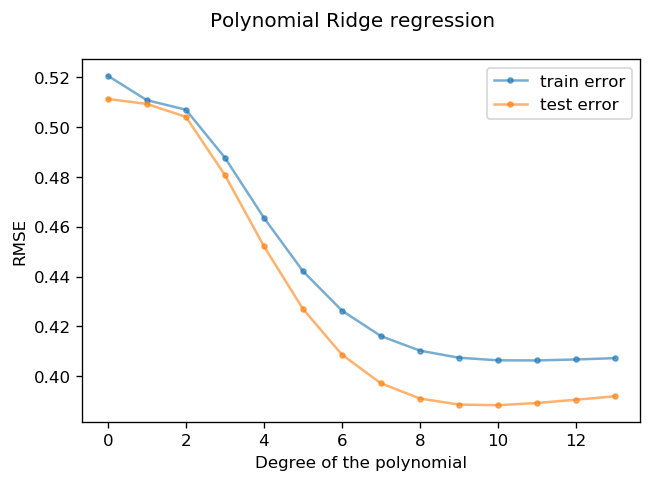

In [288]:
fig, ax = plt.subplots(dpi = 120)
ax.plot(list(train_error_ridge.values()), '.-', label = 'train error', alpha = 0.6)
ax.plot(list(test_error_ridge.values()), '.-', label = 'test error', alpha = 0.6)
ax.legend()
ax.set_xlabel('Degree of the polynomial')
ax.set_ylabel('RMSE')
fig.suptitle('Polynomial Ridge regression')
fig.show()

Even without playing around with the regularization coefficient $\lambda$ we already see that the test error does not blow off with increasing complexity of the model. On the contrary, the test error is decreasing with the degree of the polynomial. Let's see how the models are fitting the sinusoidal function.

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


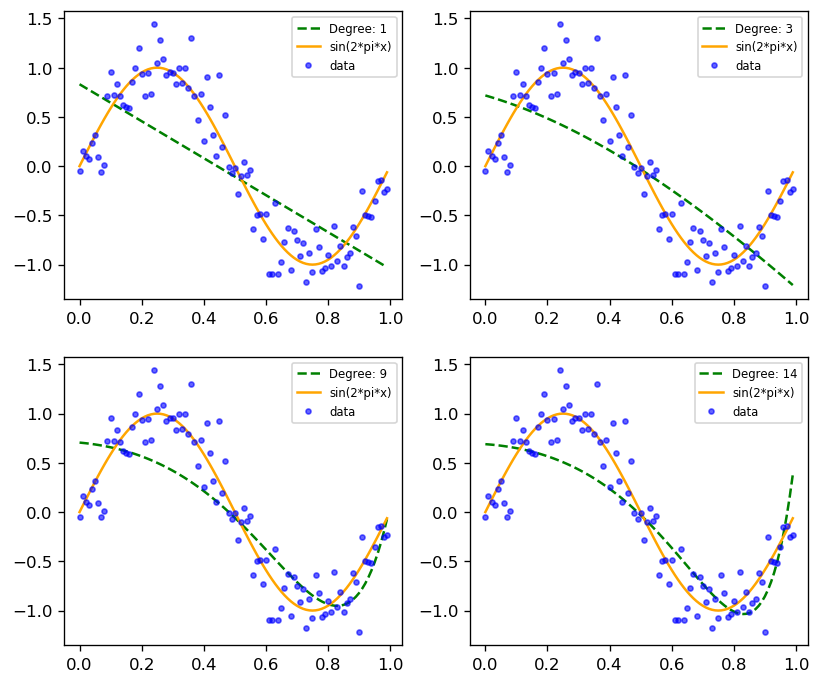

In [294]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_test, preds_ridge[str(1)], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {1}', ax = ax[0,0])
plot_polynomial_fit(X_test, preds_ridge[str(3)], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {3}', ax = ax[0,1])
plot_polynomial_fit(X_test, preds_ridge[str(9)], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {9}', ax = ax[1,0])
plot_polynomial_fit(X_test, preds_ridge[str(14)], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {14}', ax = ax[1,1])
fig.show()

We can quickly explore the effect of the regularization coefficient on the actual fitting. For illustrative purposes it is enough to fix a (rather high) degree for the polynomial function that we are trying to fit to the data and then vary the regularization term. In this sense, let us fit a 9th degree polynomialto the training data.

In [309]:
%%time
degree = 10
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
preds_alphas = {str(alpha): [] for alpha in alphas}
models_alphas = {str(alpha): None for alpha in alphas}
train_error_alphas = {str(alpha): None for alpha in alphas}
test_error_alphas = {str(alpha): None for alpha in alphas}
for alpha in alphas:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = alpha))
    model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
    models_alphas[str(alpha)] = model
    preds_alphas[str(alpha)] = model.predict(X_test.reshape(-1,1))
    train_error_alphas[str(alpha)] = rmse_error(y_train.reshape(-1,1), 
                                           model.predict(X_train.reshape(-1,1)))
    test_error_alphas[str(alpha)] = rmse_error(y_test.reshape(-1,1), 
                                          model.predict(X_test.reshape(-1,1)))    
    

CPU times: user 9.67 ms, sys: 1.12 ms, total: 10.8 ms
Wall time: 9.77 ms


/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


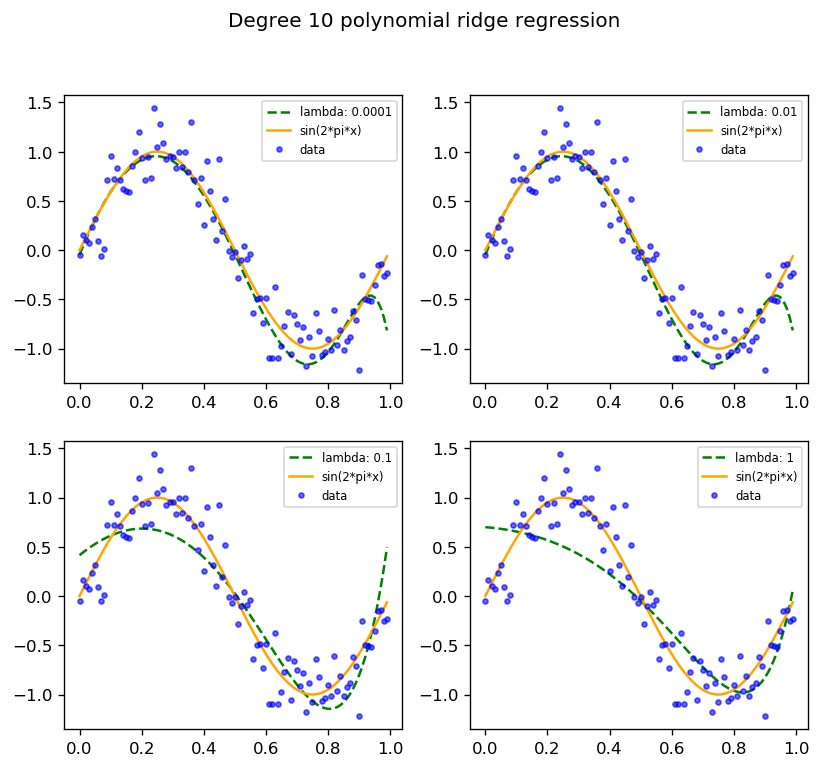

In [310]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_test, preds_alphas[str(alphas[0])], 
                    y_test, y_test_true, 
                    pred_label = f'lambda: {alphas[0]}', ax = ax[0,0])
plot_polynomial_fit(X_test, preds_alphas[str(alphas[0])], 
                    y_test, y_test_true, 
                    pred_label = f'lambda: {alphas[2]}', ax = ax[0,1])
plot_polynomial_fit(X_test, preds_alphas[str(alphas[2])], 
                    y_test, y_test_true, 
                    pred_label = f'lambda: {alphas[3]}', ax = ax[1,0])
plot_polynomial_fit(X_test, preds_alphas[str(alphas[3])], 
                    y_test, y_test_true, 
                    pred_label = f'lambda: {alphas[4]}', ax = ax[1,1])
fig.suptitle(f'Degree {degree} polynomial ridge regression')
fig.show()

Finally, we can see the evolution of train and test error with the regularization coefficient $\lambda$.

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


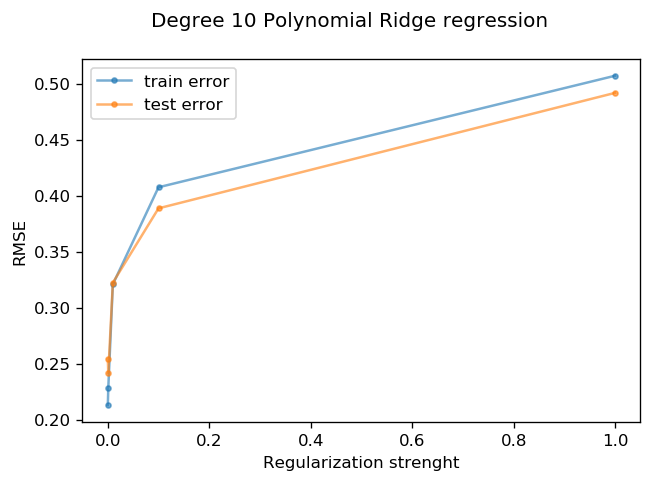

In [311]:
fig, ax = plt.subplots(dpi = 120)
ax.plot(alphas, list(train_error_alphas.values()), '.-', label = 'train error', alpha = 0.6)
ax.plot(alphas, list(test_error_alphas.values()), '.-', label = 'test error', alpha = 0.6)
ax.legend()
ax.set_xlabel('Regularization strenght')
ax.set_ylabel('RMSE')
fig.suptitle('Degree 10 Polynomial Ridge regression ')
fig.show()

make the above plot logarithmic.